<a href="https://colab.research.google.com/github/shkumar5-india/AirQualityIndex/blob/main/Air_Quality_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv


Data Set Link : [data.csv file](https://drive.google.com/file/d/19mOuD1PaL_Yvp5Pq-6jPuEF_T_WMFr9S/view?usp=sharing)

In [ ]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.columns = df.columns.str.strip()
df = df.dropna(subset=['pm2_5'])
features = ['so2', 'no2', 'rspm', 'spm']
df[features] = df[features].fillna(method='ffill')
X = df[features]
y = df['pm2_5']


<ipython-input-14-39d862f2b810>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', encoding='ISO-8859-1')
<ipython-input-14-39d862f2b810>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[features] = df[features].fillna(method='ffill')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.5659899061983413
RMSE: 21.202014465524634


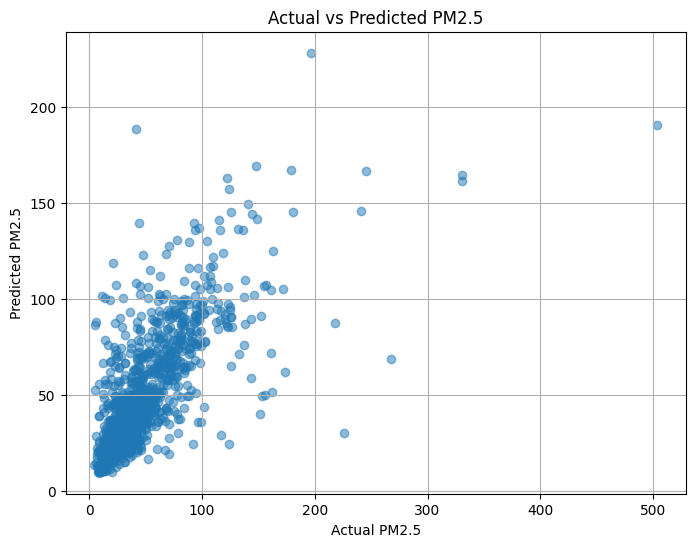

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.grid(True)
plt.show()


In [ ]:
input_data = {}

for feature in ['so2', 'no2', 'rspm', 'spm']:
    value = float(input(f"Enter value for {feature}: "))
    input_data[feature] = value

user_df = pd.DataFrame([input_data])
prediction = model.predict(user_df)
print(f"Predicted PM2.5 value: {prediction[0]:.2f}")


Enter value for so2: 20
Enter value for no2: 30
Enter value for rspm: 40
Enter value for spm: 15
Predicted PM2.5 value: 23.41


In [ ]:
pm_value = prediction[0]

if pm_value <= 30:
    status = "Good - Air quality is good."
elif pm_value <= 60:
    status = "Satisfactory - Acceptable air quality."
elif pm_value <= 90:
    status = "Moderate - Might affect sensitive people."
elif pm_value <= 120:
    status = "Poor - Unhealthy for sensitive groups."
elif pm_value <= 250:
    status = "Very Poor - Stay indoors if possible."
else:
    status = "Severe - Health alert. Avoid outdoor activity."

print(f"Predicted PM2.5 value: {pm_value:.2f}")
print(status)


Predicted PM2.5 value: 23.41
Good - Air quality is good.
